In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

from scipy.signal import find_peaks

In [3]:
def customize_axis_color(ax, axis='right', color='tab:orange'):
    """
    Customize the color of a specific axis (spine, ticks, tick labels, and label).

    Parameters:
        ax (matplotlib.axes.Axes): The Axes object to modify.
        axis (str): The axis to customize. Options: 'left', 'right', 'top', 'bottom'.
        color (str): The color to apply to the axis components.
    """
    # Customize the spine color
    # ax.spines[axis].set_color(color)

    # Customize the ticks and tick labels
    if axis in ['left', 'right']:
        ax.tick_params(axis='y', colors=color)
    elif axis in ['top', 'bottom']:
        ax.tick_params(axis='x', colors=color)

    # Customize the axis label color
    if axis == 'left':
        ax.yaxis.get_label().set_color(color)
    elif axis == 'right':
        # For right spine, you may need to enable the secondary y-axis label
        ax.yaxis.get_label().set_color(color)
    elif axis == 'bottom':
        ax.xaxis.get_label().set_color(color)
    elif axis == 'top':
        # For top spine, you may need to enable the secondary x-axis label
        ax.xaxis.get_label().set_color(color)

In [17]:
def calculate_group_stats(arr0, arr1):
    """
    Calculate mean and std for groups of array1 elements that share the same values in array0
    
    Parameters:
    arr0 (array-like): Array with repeating elements (grouping key)
    arr1 (array-like): Array with values to calculate statistics
    
    Returns:
    dict: {unique_value: (mean, std), ...}
    """
    # Convert to numpy arrays
    arr0 = np.asarray(arr0)
    arr1 = np.asarray(arr1)
    
    # Validate inputs
    if arr0.ndim != 1 or arr1.ndim != 1:
        raise ValueError("Input arrays must be 1D")
    if arr0.size != arr1.size:
        raise ValueError("Input arrays must have the same size")
    
    # Get unique values and their indices
    unique_values, inverse_indices = np.unique(arr0, return_inverse=True)
    
    # Initialize result dictionary
    result = {}
    
    # Calculate statistics for each unique value
    for idx, value in enumerate(unique_values):
        # Get mask for current group
        mask = inverse_indices == idx
        group_values = arr1[mask]
        
        # Calculate statistics
        if group_values.size == 0:
            mean = std = np.nan
        else:
            mean = np.mean(group_values)
            std = np.std(group_values, ddof=1)  # Sample standard deviation
        
        result[value] = {'mean': mean, 'std': std, 'count': group_values.size}
    
    return result

In [7]:
df = pd.read_csv(r'./varyMWAmplitude.csv', names=['time', 'outdBm', 'dcPD', 'mwdBmPD'], skiprows=1)

In [12]:
pd_mw_pwr = df.mwdBmPD
pd_mw_amp = np.sqrt(10**(pd_mw_pwr/10)*1e-3 * 2 * 50)
pd_dc_voltage = df.dcPD
amp_mod_ratio = pd_mw_amp / pd_dc_voltage

In [22]:
stats = calculate_group_stats(df.outdBm, amp_mod_ratio)

Text(0.5, 1.0, 'Group Means with Standard Deviation')

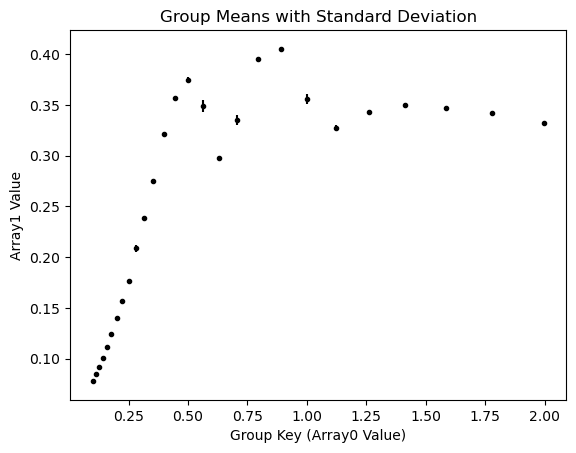

In [31]:
# Sort keys for consistent ordering
keys = np.sort(list(stats.keys()))
means = [stats[k]["mean"] for k in keys]
stds = [stats[k]["std"] for k in keys]

fig, ax = plt.subplots()
# Plot with error bars
ax.errorbar(
    np.sqrt(10 ** (keys / 10) * 1e-3 * 2 * 50) , means, yerr=stds, fmt=".", color="k"
)

# Formatting
ax.set_xlabel("Group Key (Array0 Value)")
ax.set_ylabel("Array1 Value")
ax.set_title("Group Means with Standard Deviation")

In [27]:
keys

array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.])